Name: Chanyu Choung

Class: CMP414

Homework due date: Mar 8th, 2021 (Monday)

# Week 5 Homework
This homework assignment aims to build a simple linear regression model using the `radio` feature. (Source of data: https://www.statlearning.com/s/Advertising.csv)


1. Apply the normal equation to calculate parameter values for the best fit.

2. Display the regression line with the training data points.

3. Use `sklearn` to build the same model. Verify that the parameters values are the same as those from the normal equation.

In [6]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data frame
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)

In [54]:
# Applying the Normal Equation
X = np.hstack([np.ones([len(data), 1]), data[['radio']].values])
y = data[['sales']].values

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta)

[[9.3116381 ]
 [0.20249578]]


In [49]:
# Calculates Squared Error
def SE(B0, B1, data, i):
    x = data.loc[i, 'radio']
    y = data.loc[i, 'sales']
    prediction = B0 + B1 * x
    error = (y - prediction) ** 2
    return error

# Finding the Mean of MSE
def get_MSE(B0, B1, data):
    list_errors = [SE(B0, B1, data , i) for i in data.index] # loops SE function
    MSE = np.mean(list_errors)
    return MSE

Mean Squared Error: 18.09239774512544


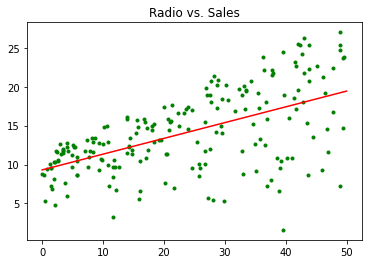

In [50]:
# Calling the MSE function
B0 = beta[0]
B1 = beta[1]
print("Mean Squared Error:", get_MSE(B0, B1, data))

# Plot the data points with a regression line.
plt.title('Radio vs. Sales')
plt.plot(data['radio'], data['sales'], 'g.')
x_coordinates = np.array([0,50])
y_coordinates = x_coordinates * B1 + B0
plt.plot(x_coordinates, y_coordinates, 'r-')

In [56]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
data = advertising.loc[:, ['radio', 'sales']]
model_lr.fit(data[['radio']], data[['sales']])

# Result of Slope, Y-Intercept from SKLearn
print(model_lr.coef_) # Slope
print(model_lr.intercept_) # Y-Intercept

[[0.20249578]]
[9.3116381]


Yes, I verified that they're both the same:
[[0.20249578], [9.3116381]]